In [1]:
import projetLib as proj
from torch.utils.data import DataLoader
import torch
from torch.utils.data import Subset
import torchvision
from tqdm import tqdm
import sys

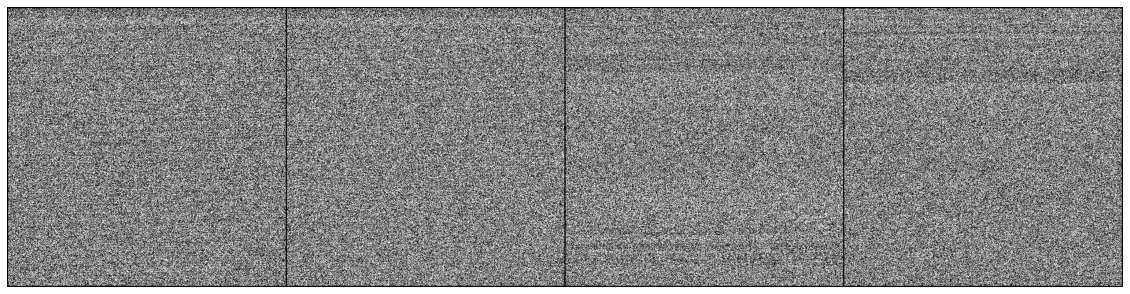

In [5]:
resize = (480,480)
batch_size = 4
train,test = trainDataset, testDataset = proj.image.getTrainTest(
    resize=resize, batch_size=batch_size, seed=1,
    test_proportion=0.2, extensions=["pe","elf"], doRGB=False)
dataloader = DataLoader(train, num_workers=2, batch_size=16, shuffle=True)
x,y  = next(iter(dataloader)) # On itére en général sur un dataloader avec une boucle pour récupérer des batch (de taille batch_size) mais on peut aussi récupérer seulement le premier batch comme ici
proj.utils.plot_img(x) # Affichage du premier batch

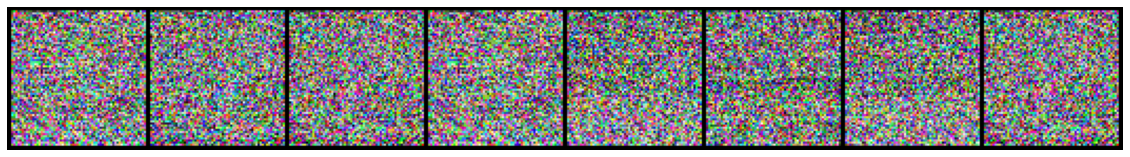

torch.Size([8, 3, 64, 64])


In [3]:
resize = (64,64)
batch_size = 4
train,test = trainDataset, testDataset = proj.image.getTrainTest(
    resize=resize, batch_size=batch_size, seed=1,
    test_proportion=0.2, extensions=["pe","msdos","elf","other"], doRGB=True)
dataloader = DataLoader(train, num_workers=2, batch_size=16, shuffle=True)
x,y  = next(iter(dataloader)) # On itére en général sur un dataloader avec une boucle pour récupérer des batch (de taille batch_size) mais on peut aussi récupérer seulement le premier batch comme ici
proj.utils.plot_img(x) # Affichage du premier batch
print(x.shape)

In [4]:
limit = 4
print(len(trainDataset))
if limit : 
    trainDataset,_ = torch.utils.data.random_split(trainDataset, [limit, len(trainDataset)-limit])
print(len(trainDataset))

x,y = next(iter(trainDataset))
print(x.shape[0])

8
4
1


In [3]:
import numpy as np

class Crop_img(torch.nn.Module):

    def __init__(self, size, doRGB=False):
        super().__init__()
        self.size = size
        self.doRGB = doRGB
        
    def crop_img(self, img, resize):
        h,w = resize
        img_arr = np.array(img)
        h2,w2   = img_arr.shape
        img_arr = list(np.reshape(img_arr, (h2*w2)))
        img_arr += [0]*(h*w - len(img_arr))
        img_arr = img_arr[:h*w]
        img_arr = np.reshape(np.array(img_arr), (h,w))
        img     = Image.fromarray(img_arr.astype('uint8'), 'L')
        return img

    def crop_img_RGB(self, img, resize):
        h,w = resize
        img_arr = np.array(img)
        h2,w2   = img_arr.shape
        img_arr = list(np.reshape(img_arr, (h2*w2)))
        img_arr += [0]*(h*w*3 - len(img_arr))
        img_arr = img_arr[:h*w*3]
        img_arr = np.reshape(np.array(img_arr), (h,w,3))
        img     = Image.fromarray(img_arr.astype('uint8'), 'RGB')
        return img

    def forward(self, img):
        if self.doRGB : return self.crop_img_RGB(img,self.size)
        else : return self.crop_img(img,self.size)

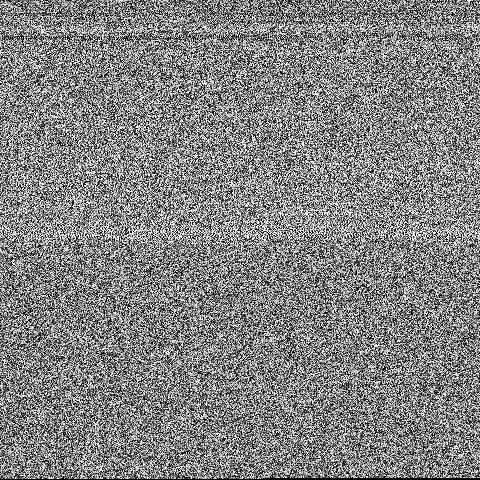

(256, 256, 3)


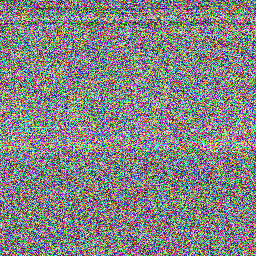

In [26]:
from PIL import Image,ImageFile
path = "./data/images/Virusshare00456/pe/"
file = "547346756797973833.jpg"
path += file
with Image.open(path) as img:
    display(img)
img = crop_img_RGB(path)
display(img)

In [6]:
import pandas as pd
import torch.nn as nn
import numpy as np
from torchmetrics import ConfusionMatrix
import projetLib as proj
from torch.utils.data import DataLoader

testloader = DataLoader(testDataset, num_workers=2, batch_size=batch_size, shuffle=True)
model = proj.model.ENet() # VGG16(input_channel=3)

with torch.no_grad():
    
    model.eval()
    matrix = torch.zeros((2,2))
    confmat = ConfusionMatrix(task="binary", num_classes=2)
    for x, y in testloader : 
        print(x.shape)
        #x = torch.cat((x, x, x), 1)
        print(x.shape)
        outputs = model(x)
        print(outputs.shape)
        outputs = torch.reshape(outputs,(len(y),))
        print(outputs)
        matrix  += confmat(outputs, y)

    (tp,fp),(fn,tn) = matrix
    accuracy = (tp+tn)/(tp+tn+fp+fn) 
    print(accuracy)
        
        #recall = tp/(tp+fn) # quelle proporition positif a été id correctement 
        #precision = tp/(tp+fp) # quelle proportion positif = correct


torch.Size([4, 1, 480, 480])
torch.Size([4, 1, 480, 480])


/home/thomas/.local/lib/python3.10/site-packages/torch/nn/functional.py:749: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"


torch.Size([4, 128, 60, 60])


RuntimeError: shape '[4]' is invalid for input of size 1843200

In [1]:
import projetLib as proj
from torch.utils.data import DataLoader
import torch
from torch.utils.data import Subset
import torchvision
from tqdm import tqdm
import sys

batch_size = 4

trainDataset, testDataset = proj.image.getTrainTest(
    resize=(224,224), batch_size=batch_size, seed=1,
    test_proportion=0.2, extensions=["pe","msdos","elf","other"])
print(len(trainDataset),len(testDataset))

8 16


In [2]:
trainloader = DataLoader(trainDataset, num_workers=2, batch_size=batch_size, shuffle=True)
testloader = DataLoader(testDataset, num_workers=2, batch_size=batch_size, shuffle=True)

for x,y in testloader : 
    print(y)

tensor([0, 0, 1, 0])
tensor([0, 1, 0, 0])
tensor([0, 1, 0, 0])
tensor([0, 1, 0, 0])


In [3]:
print(y)

tensor([0, 1, 0, 0])


In [4]:
y[y==0] = -1
print(y)

tensor([-1,  1, -1, -1])


In [5]:
path = "./data/samples/"
file = "b530de08530d1ba19a94bc075e74e2236c106466dedc92be3abdee9908e8cf7e"
path += file
res = proj.opcodes.extract_sequence(path)

In [9]:
#";".join(res)
res

['begin',
 'sdt',
 'uj',
 'udt',
 'uj',
 ('sdt', 2),
 'uj',
 'udt',
 'uj',
 ('sdt', 2),
 'uj',
 'bai',
 'sdt',
 ('int', 5),
 'bai',
 ('sdt', 2),
 'uj',
 'udt',
 'sdt',
 'uj',
 'sdt',
 'uj',
 'udt',
 'bai',
 'byi',
 'cj',
 'sdt',
 'uj',
 'bai',
 'li',
 ('sdt', 2),
 'bai',
 'int',
 'udt',
 'sdt',
 ('udt', 4),
 'uj',
 'sdt',
 ('udt', 2),
 'uj',
 'sdt',
 'udt',
 'misc',
 ('sdt', 2),
 'uj',
 'bai',
 'byi',
 'cj',
 'misc',
 ('sdt', 2),
 'uj',
 'bai',
 'byi',
 'cj',
 'misc',
 'sdt',
 'uj',
 'bai',
 'udt',
 ('sdt', 2),
 'bai',
 'int',
 ('sdt', 3),
 'uj',
 'bai',
 'li',
 ('sdt', 2),
 'bai',
 'int',
 ('sdt', 3),
 'uj',
 'bai',
 'li',
 ('sdt', 2),
 'bai',
 ('int', 7),
 ('sdt', 2),
 'udt',
 ('sdt', 2),
 'udt',
 'sdt',
 'uj',
 'sdt',
 'misc',
 ('sdt', 3),
 'uj',
 'udt',
 ('bai', 2),
 'cj',
 'bai',
 'cj',
 ('sdt', 3),
 'uj',
 'sdt',
 'misc',
 ('sdt', 3),
 'uj',
 'udt',
 'sdt',
 'bai',
 ('sdt', 2),
 'uj',
 'sdt',
 'misc',
 ('sdt', 3),
 'uj',
 'udt',
 ('bai', 2),
 'cj',
 'bai',
 'cj',
 'udt',
 'uj',
 